In [1]:
import os
from keras import layers, models, losses, optimizers
import matplotlib.pyplot as plt
import sys

sys.path.append("..")
os.environ["KERAS_BACKEND"] = "torch"

In [2]:
# load image data 
import os
import numpy as np
from numpy import linalg as LA
import h5py
import cv2 as cv
from src.dataset import load
from IPython.display import display
from PIL import Image

images_mat = load(gray=True) / 255.0
print(images_mat.shape)
nums, _ = images_mat.shape
images_mat =images_mat.reshape(nums, 120, 90)
images_shape = images_mat[0].reshape((120, 90, 1)).shape


# load embedding data
h5f = h5py.File('../dataset/eigenface_embeds.h5','r')
train_embeds = np.copy(h5f['embeds'])
print(train_embeds[0].shape)
print(LA.norm(train_embeds[0]))
h5f.close()



(5749, 10800)
(384,)
1.0000000000000002


(120, 90, 1)


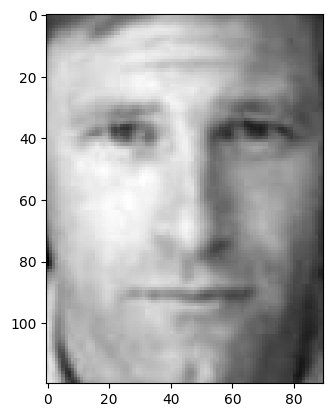

In [3]:
plt.imshow(images_mat[0], cmap=plt.cm.gray)
print(images_shape)

In [4]:
# Keras model

model = models.Sequential()
model.add(layers.InputLayer(input_shape=images_shape))
# model.add(layers.Conv2D(6, (5, 5),padding="same", activation='relu', input_shape=images_shape))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(16, (5, 5), padding="same", activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(768, activation='relu'))
model.add(layers.Dense(384, activation='tanh'))

model.summary()

c:\anaconda\envs\py39\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 10800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    11,060,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 768)            │       787,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 384)            │       295,296 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,142,720 (46.32 MB)

 Trainable params: 12,142,720 (46.32 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
loss = losses.CosineSimilarity()
opt = optimizers.Adafactor(learning_rate=0.1)

model.compile(
    optimizer=opt, loss=loss
)

train_imgs = images_mat
history = model.fit(
    train_imgs, train_embeds, 
    batch_size=50,
    # epochs=50, 
    epochs=50, 
    # Suppress logging.
    # verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.7,
)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0011 - val_loss: 0.0063
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: -0.0165 - val_loss: 0.0068
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: -0.0172 - val_loss: 0.0069
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: -0.0179 - val_loss: 0.0069
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: -0.0188 - val_loss: 0.0069
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: -0.0187 - val_loss: 0.0069
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: -0.0188 - val_loss: 0.0069
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: -0.0193 - val_loss: 0.0069
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: -0.0188 - val_loss: 0.0070
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: -0.0195 - val_loss: 0.0070
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: -0.0203 - val_loss: 0.0069
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step -

KeyboardInterrupt: 

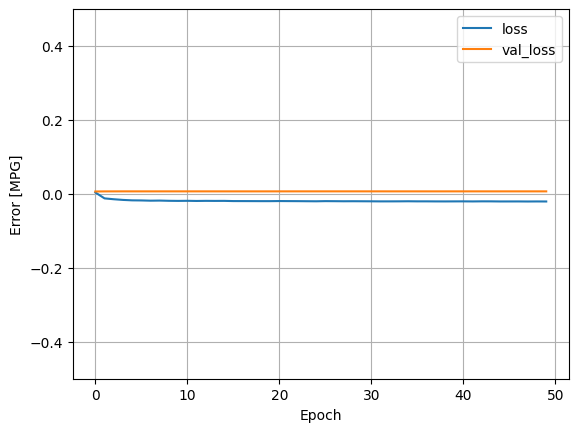

In [ ]:
def plot_loss(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.ylim([-0.5, 0.5])
    plt.xlabel("Epoch")
    plt.ylabel("Error [MPG]")
    plt.legend()
    plt.grid(True)


plot_loss(history)


In [ ]:
from numpy import linalg as LA
test_images = np.asarray([train_imgs[0]])

print(test_images.shape)
predict_embed = model.predict(test_images)[0]

print(predict_embed.shape)
print(train_embeds[0].shape)

print(f"train embed norm: {LA.norm(train_embeds[0])}")
print(f"predict embed norm: {LA.norm(predict_embed)}")

(1, 120, 90)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
(384,)
(384,)
train embed norm: 1.0000000000000002
predict embed norm: 0.043599095195531845


In [ ]:
import torch
import torch.nn.functional as F

def euclidean(source: torch.Tensor, target: torch.Tensor) -> float:
    pdist = torch.nn.PairwiseDistance(p=2)
    return pdist(source, target)

def cosine_similarity(source: torch.Tensor, target: torch.Tensor) -> float:
    return F.cosine_similarity(source, target, dim=0)


a, b = torch.from_numpy(train_embeds[0]), torch.from_numpy(predict_embed)
cosine_similarity(a, b)

tensor(-0.0273, dtype=torch.float64)